Độ chính xác: 97.78%
Ma trận nhầm lẫn:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  0  1]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  1  0  0  1  0 37]]
Báo cáo phân loại:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.93      0.94        40

    accuracy 

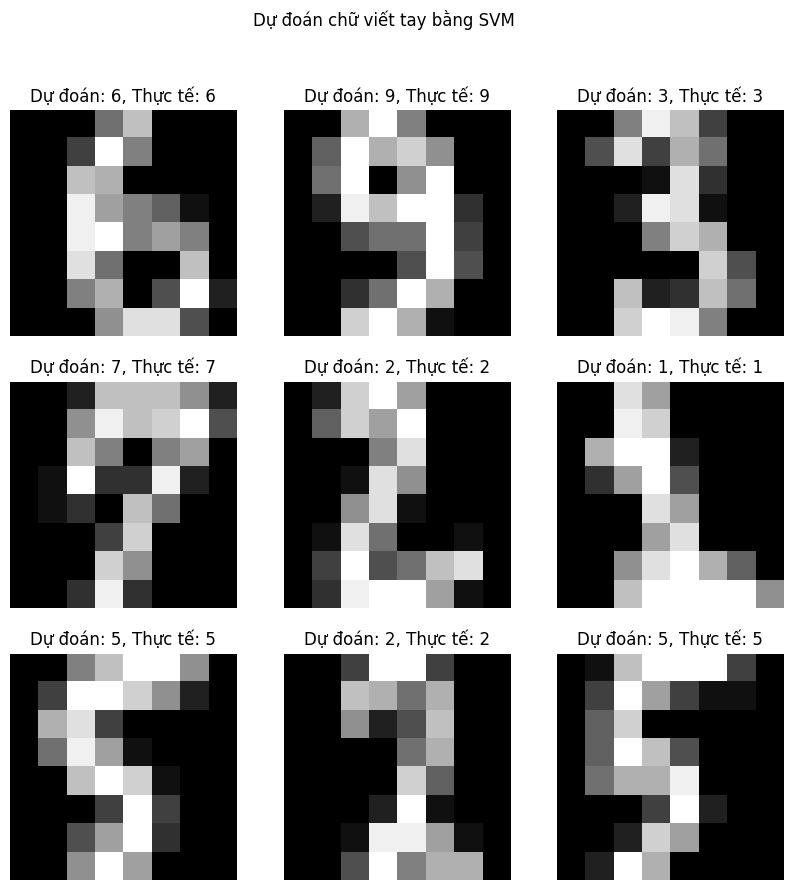

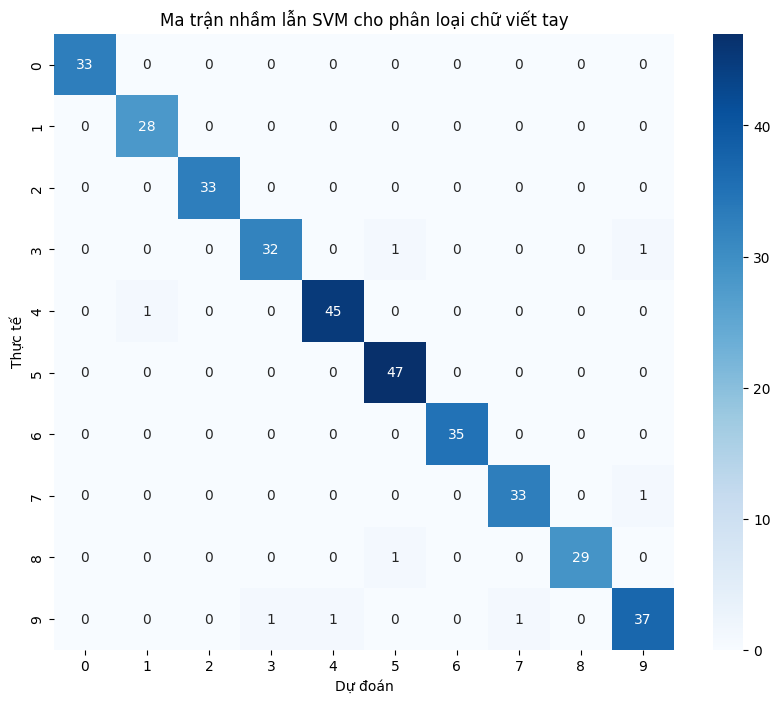

In [1]:
from sklearn import datasets # Import tập dữ liệu chữ viết tay
from sklearn.model_selection import train_test_split # Import hàm chia tập dữ liệu
from sklearn.svm import SVC # Import mô hình máy vector hỗ trợ
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt # Import thư viện vẽ đồ thị
import seaborn as sns # Import thư viện vẽ đồ thị

# Tải bộ dữ liệu chữ viết tay (Digits dataset từ sklearn)
digits = datasets.load_digits() # Bộ dữ liệu chứa 1797 ảnh chữ số viết tay kích thước 8x8
X, y = digits.data, digits.target # X là dữ liệu, y là nhãn tương ứng

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình SVM
model = SVC(kernel='linear', C=1.0, random_state=42) # Sử dụng kernel tuyến tính
model.fit(X_train, y_train) # Huấn luyện mô hình với tập huấn luyện

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test) # Dự đoán nhãn của tập kiểm tra

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred) # Độ chính xác
conf_matrix = confusion_matrix(y_test, y_pred) # Ma trận nhầm lẫn
class_report = classification_report(y_test, y_pred) # Báo cáo phân loại

# In ra độ chính xác, ma trận nhầm lẫn và báo cáo phân loại
print(f"Độ chính xác: {accuracy * 100:.2f}%") # Độ chính xác
print("Ma trận nhầm lẫn:\n", conf_matrix) # Ma trận nhầm lẫn
print("Báo cáo phân loại:\n", class_report)  # Báo cáo phân loại

# Hiển thị một số hình ảnh chữ số và dự đoán tương ứng
plt.figure(figsize=(10, 10)) # Tạo một figure có kích thước 10x10 inch
for i in range(9): # Hiển thị 9 hình ảnh
    plt.subplot(3, 3, i + 1) # Chia figure thành 3x3 subplot, vẽ ảnh thứ i+1
    plt.imshow(X_test[i].reshape(8, 8), cmap='gray') # Vẽ ảnh dưới dạng 8x8 pixels
    plt.title(f"Dự đoán: {y_pred[i]}, Thực tế: {y_test[i]}") # Tiêu đề của ảnh
    plt.axis('off') # Tắt trục tọa độ
plt.suptitle("Dự đoán chữ viết tay bằng SVM") # Tiêu đề chung của figure
plt.show()

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(10, 8)) # Tạo một figure có kích thước 10x8 inch
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Dự đoán") # Tên trục x là Dự đoán (Predicted) và trục y là Thực tế (Actual)
plt.ylabel("Thực tế") # Tên trục y là Thực tế (Actual) và trục x là Dự đoán (Predicted)
plt.title("Ma trận nhầm lẫn SVM cho phân loại chữ viết tay") # Tiêu đề của figure
plt.show() # Hiển thị figure